# Diamond Price Prediction

Here we analyze diamond price using a dataset from Kaggle https://www.kaggle.com/shivam2503/diamonds. The analysis includes retrieving data from a CSV file, data mining, analytics,  modelling and data visualization.

The analysis is based in Python and uses Numpy and panda for data manipulation, seaborn and matplotlib for creating visualizations, and Scikit-Learn for construction and evaluation of regression models.

## Import libraries

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Import dataset

In [181]:
# Import dataset
diamond = pd.read_csv('diamonds.csv')

In [182]:
# View dataset
diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


There are 10 features and 53940 entries in the original dataset.

In [183]:
# View data types
diamond.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## Clean dataset

In [184]:
# Confirm there are no duplicated rows
diamond.duplicated().sum()

0

In [185]:
# Delete the first column which is irrelvant
diamond = diamond.drop(['Unnamed: 0'], axis=1)

In [186]:
# Basic Statistics
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Columns 'x', 'y' and 'z' which represent the length, width and height of diamonds contain missing values.

In [187]:
# Check if there is missing data
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no missing data in this dataset.

In [188]:
# Find out number of row containing zero values in each column
for column in diamond.columns:
  if (diamond[column].dtypes == 'int' or diamond[column].dtypes == 'float'):
    print(column + ' - ' + str(diamond[diamond[column]==0].price.count())) 

carat - 0
depth - 0
table - 0
price - 0
x - 8
y - 7
z - 20


The columns 'x', 'y' and 'z' contain some zero values, which were missing values.

In [189]:
# Replace zero values in columns 'x', 'y' and 'z' with NaN
diamond.x = diamond.x.replace(0, np.nan)
diamond.y = diamond.y.replace(0, np.nan)
diamond.z = diamond.z.replace(0, np.nan)

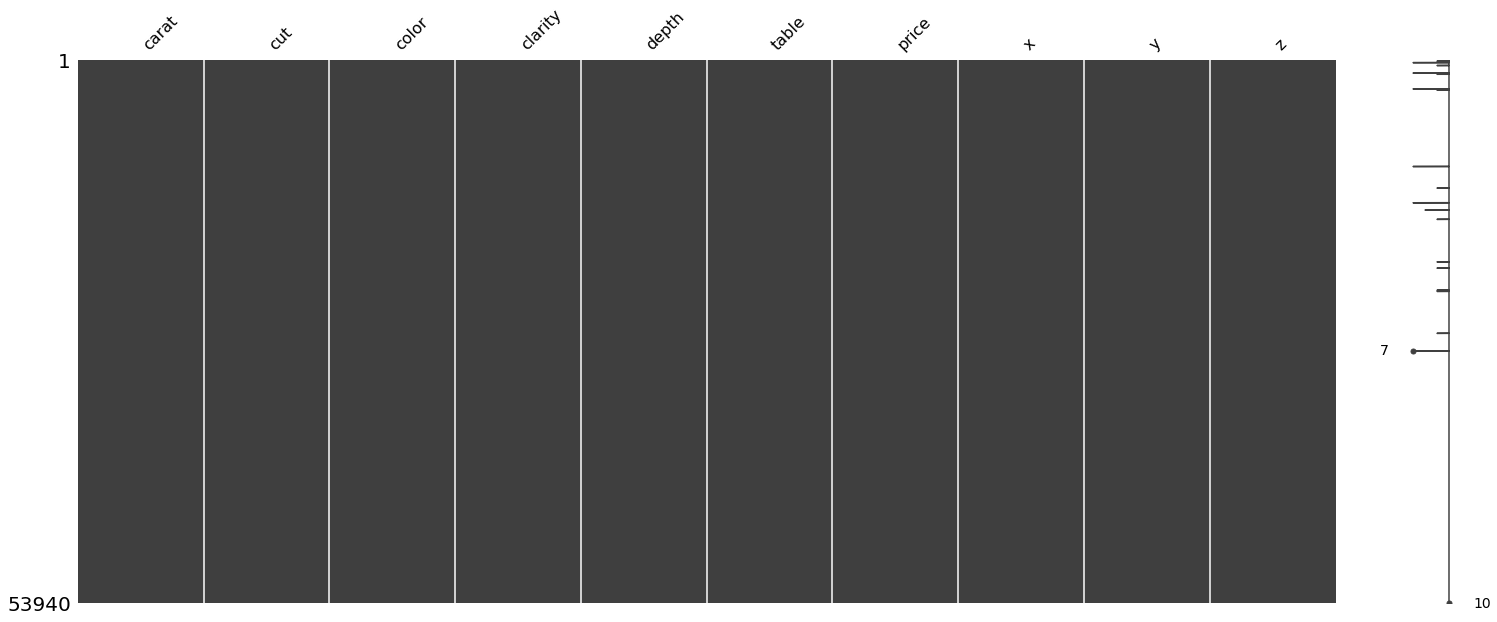

In [190]:
# Visualise data with zero values
import missingno as msno
diamondbyPrice =  diamond.sort_values(by = 'price', ascending = False)
msno.matrix(diamondbyPrice)
plt.show()

Zero 'x', 'y' or 'z' values are more frequent for higher priced diamonds, but considering the number of zero value examples is very small compared to the dataset (approximately 0.064% of examples), it is acceptable to remove data with zero 'x', 'y' or 'z' values.

In [191]:
diamond = diamond.dropna(subset = ['x','y','z'])

In [192]:
# View unique variables in each categorical column
for column in diamond.columns:
    if diamond[column].dtypes == 'object':
        print(column +':')
        print(diamond[column].unique())
        print('\n')

cut:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


color:
['E' 'I' 'J' 'H' 'F' 'G' 'D']


clarity:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']




## Display summary statistics

In [193]:
#### Basic statistics
diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


All features except price have similar standard deviation (or variance).

In [194]:
# Find the coefficient of variation
diamond.std()/diamond.mean()

carat    0.593953
depth    0.023196
table    0.038882
price    1.014319
x        0.195306
y        0.198805
z        0.198452
dtype: float64

In [195]:
# Find the skewness
diamond.skew()

carat    1.116207
depth   -0.081726
table    0.796799
price    1.618349
x        0.398348
y        2.462211
z        1.585490
dtype: float64

In [196]:
# Find Pearson correlation coefficients
diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


## Investigate distribution and correlation of features

[]

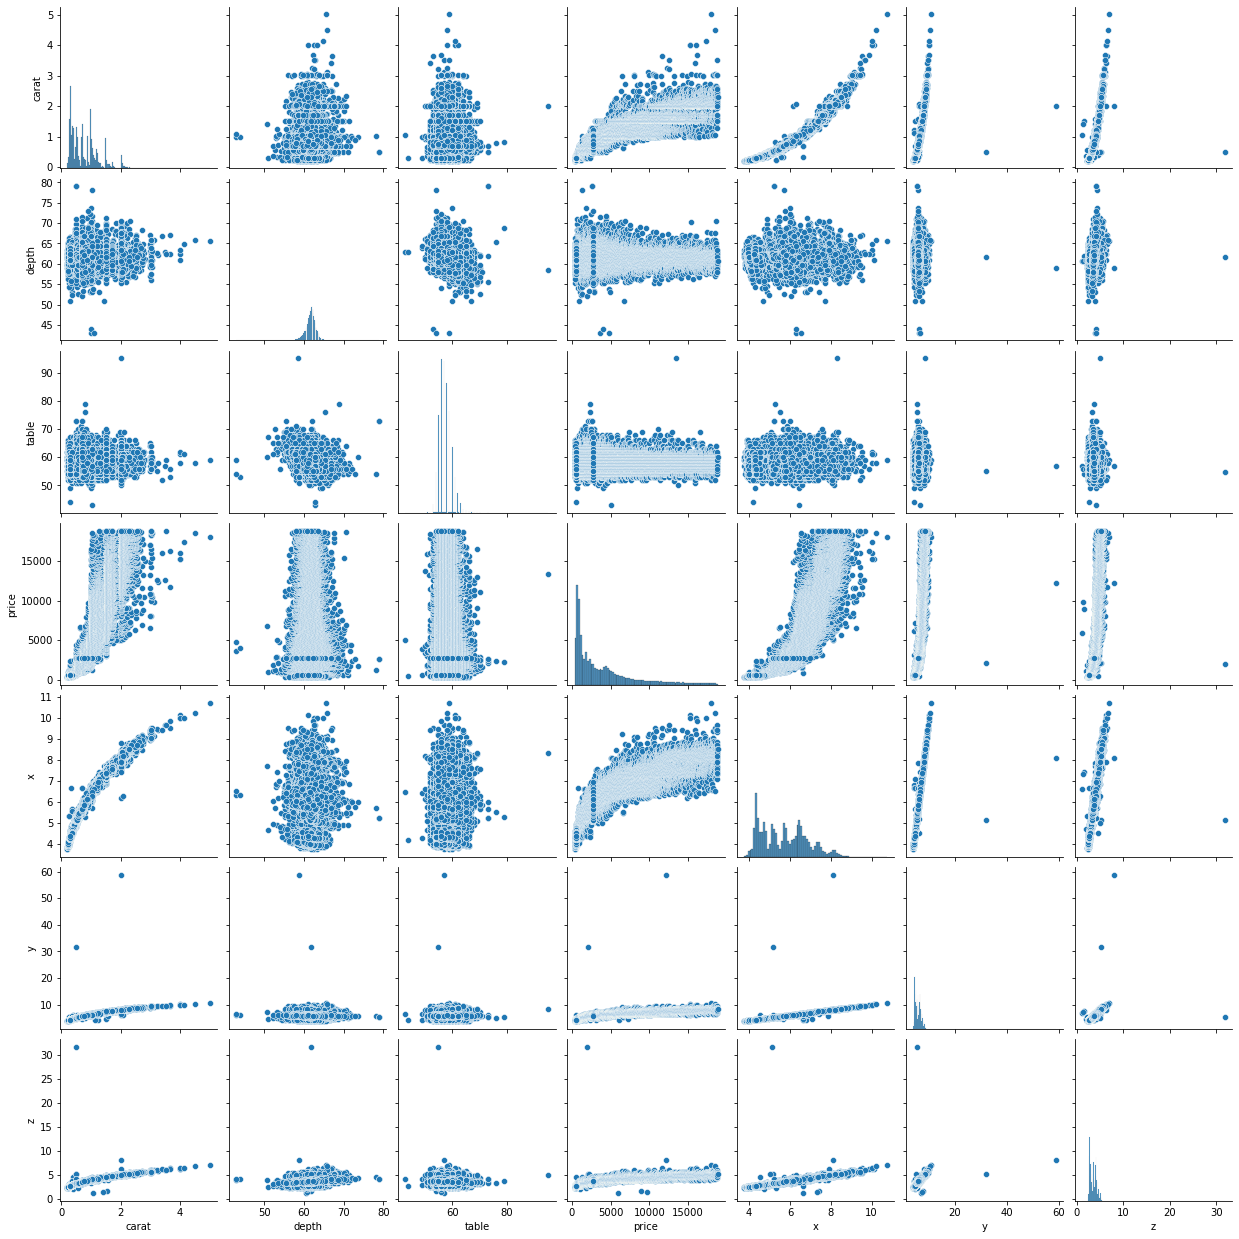

In [197]:
# Visualize pairwise correlation and distribution of numeric features
sns.pairplot(diamond, diag_kind='hist')
plt.plot()

### 1. Carat

In [198]:
len(diamond)

53920

In [199]:
weight = [0.25,0.5,0.75,1,1.25,1.5]
for k in weight:
 NumSmaller = diamond[diamond.carat <= k].carat.count()
 print('%.2f%% of the diamonds in the dataset are less than %.2f carat'%(NumSmaller/len(diamond),k))

0.01% of the diamonds in the dataset are less than 0.25 carat
0.35% of the diamonds in the dataset are less than 0.50 carat
0.56% of the diamonds in the dataset are less than 0.75 carat
0.68% of the diamonds in the dataset are less than 1.00 carat
0.86% of the diamonds in the dataset are less than 1.25 carat
0.90% of the diamonds in the dataset are less than 1.50 carat


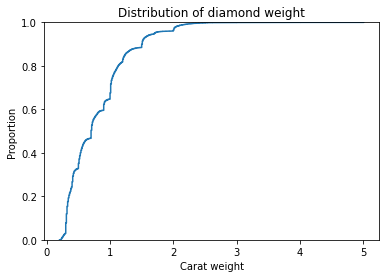

In [200]:
sns.ecdfplot(diamond.carat)
plt.title('Distribution of diamond weight')
plt.xlabel('Carat weight')
plt.show()

Carat appears to have a positive correlation with price. The majority of the diamonds (90%) int the dataset is less than 1.5 carats.

### 2. Cut

In [201]:
diamond.groupby('cut').size()

cut
Fair          1609
Good          4902
Ideal        21548
Premium      13780
Very Good    12081
dtype: int64

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


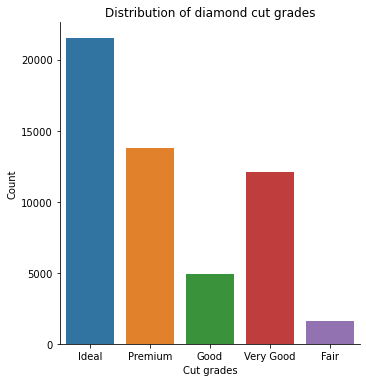

In [202]:
sns.catplot("cut", data=diamond, kind="count")
plt.title('Distribution of diamond cut grades')
plt.xlabel('Cut grades')
plt.ylabel('Count')
plt.show()

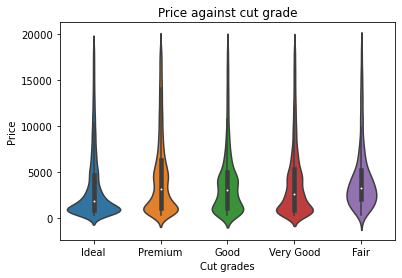

In [203]:
sns.violinplot(data = diamond, x = 'cut', y='price')
plt.title('Price against cut grade')
plt.xlabel('Cut grades')
plt.ylabel('Price')
plt.show()

In [204]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


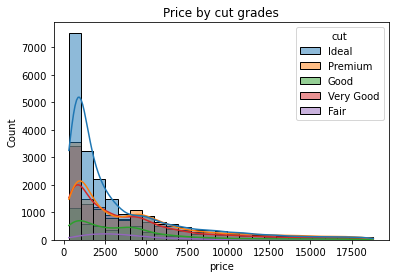

In [205]:
sns.histplot(data=diamond, x= 'price', bins=25, hue='cut', kde=True)
plt.title('Price by cut grades')
plt.show()

There is no obvious correlation between cut grades and price. Those of 'Ideal' cut appeared lower in price in general.

Most of the diamonds in the dataset have 'Very Good', 'Premium' or 'Ideal' cut grades. 

### 3. Color

In [206]:
diamond.groupby('color').size()

color
D     6774
E     9797
F     9538
G    11284
H     8298
I     5421
J     2808
dtype: int64

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


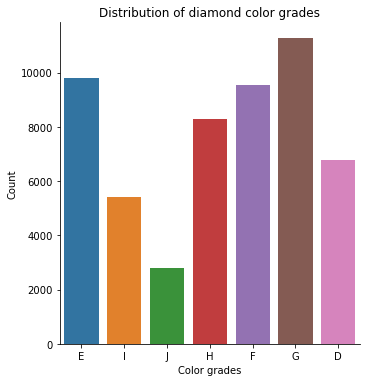

In [207]:
sns.catplot("color", data=diamond, kind="count")
plt.title('Distribution of diamond color grades')
plt.xlabel('Color grades')
plt.ylabel('Count')
plt.show()

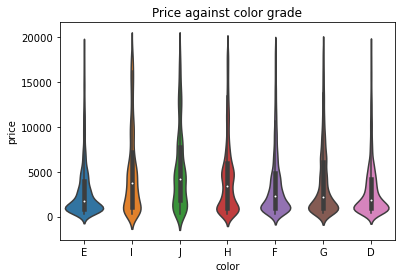

In [208]:
sns.violinplot(data = diamond, x = 'color', y ='price')
plt.title('Price against color grade')
plt.show()

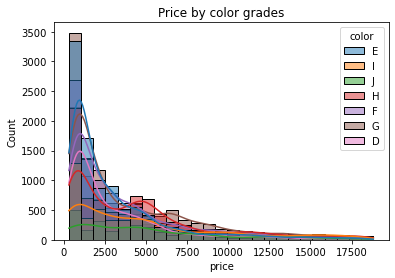

In [209]:
sns.histplot(x= "price", data=diamond, bins=25, hue="color", kde=True)
plt.title('Price by color grades')
plt.show()

Diamonds of 'G', 'H', 'I' or 'J' colour appeared more expensive in general. 

Fewer diamonds in the dataset belong to 'I' or 'J' colour.

### 4. Clarity

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


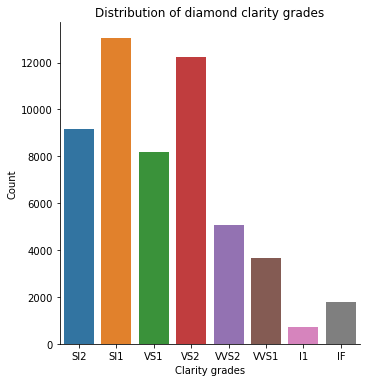

In [210]:
sns.catplot("clarity", data=diamond, kind="count")
plt.title('Distribution of diamond clarity grades')
plt.xlabel('Clarity grades')
plt.ylabel('Count')
plt.show()

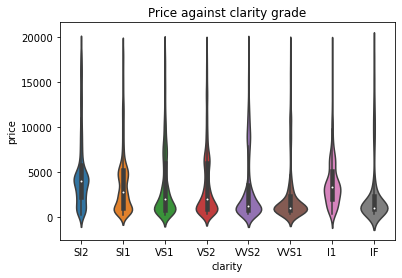

In [211]:
sns.violinplot(data = diamond, x = 'clarity', y='price')
plt.title('Price against clarity grade')
plt.show()

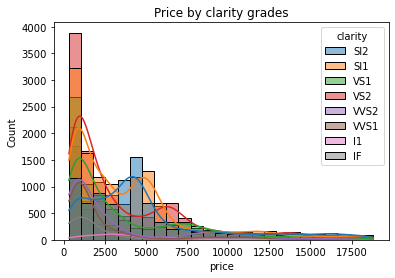

In [212]:
sns.histplot(data=diamond, x= "price", bins=25, hue="clarity", kde=True)
plt.title('Price by clarity grades')
plt.show()

Diamonds of 'I1', 'SI1' and 'SI2' appeared more expensive in general than those of other clarity grades.

Fewer diamonds in the dataset belong to 'VVS2', 'VVS1', 'I1' or 'IF'.

### 5. Depth

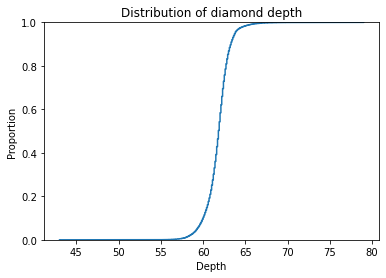

In [213]:
sns.ecdfplot(diamond.depth)
plt.title('Distribution of diamond depth')
plt.xlabel('Depth')
plt.show()

### 6. Table

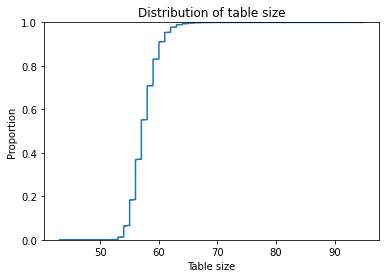

In [214]:
sns.ecdfplot(diamond.table)
plt.title('Distribution of table size')
plt.xlabel('Table size')
plt.show()

### 7. x

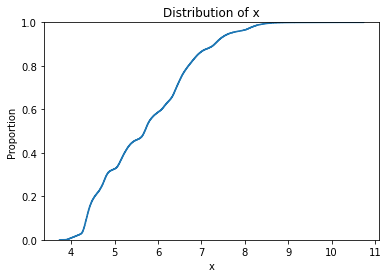

In [215]:
sns.ecdfplot(diamond.x)
plt.title('Distribution of x')
plt.xlabel('x')
plt.show()

### 8. y

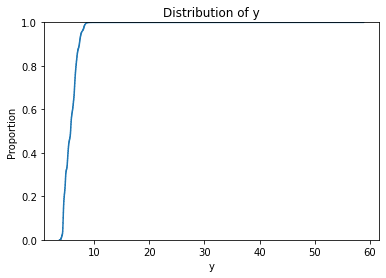

In [216]:
sns.ecdfplot(diamond.y)
plt.title('Distribution of y')
plt.xlabel('y')
plt.show()

### 9. z

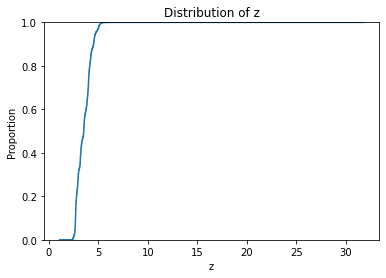

In [217]:
sns.ecdfplot(diamond.z)
plt.title('Distribution of z')
plt.xlabel('z')
plt.show()

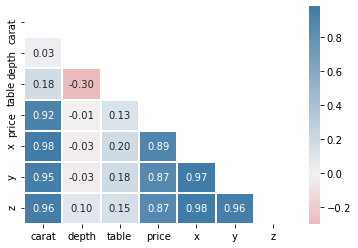

In [218]:
# Visualize Pearson correlation matrix
corr = diamond.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
ax = sns.heatmap(diamond.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")
plt.show()

Amongst the numeric features,'carat','x','z' and 'y' have very strong correlation of >0.85 with price.

## Encode Categorical Variables

In [219]:
diamond['cut'] = diamond.cut.map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})

In [220]:
diamond['color'] = diamond.color.map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})

In [221]:
diamond['clarity'] = diamond.clarity.map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

## Experiment 1: Compare regression models using all features

In [222]:
# Divide data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(diamond.loc[:, diamond.columns != 'price'], diamond.price,test_size=0.2, random_state=1)

In [223]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [224]:
# Instantiate regression models
linear = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR(kernel='rbf')

In [225]:
# Create function that performs cross-validation and evaluates each regressor
def models_evaluation(X_train, y_train):
    
    # Use 'neg_mean_squared_error' as performance metric
    scoring = 'neg_mean_squared_error'
    
    # Perform cross-validation on each regressor
    cv_linear = cross_validate(linear, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_knn = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_dt = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_rf = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svm = cross_validate(svm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each regressor
    mean_scores_table = pd.DataFrame({'Linear Regression':[cv_linear['test_score'].mean()],
                                       'K-Nearest Neighbor':[cv_knn['test_score'].mean()],
                                      'Decision Tree':[cv_dt['test_score'].mean()],
                                       'Random Forest':[cv_rf['test_score'].mean()],
                                       'Support Vector Machine':[cv_svm['test_score'].mean()]},
                                      index=['Negative Mean Squared Error'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each regressor
    std_scores_table = pd.DataFrame({'Linear Regression':[cv_linear['test_score'].std()],
                                       'K-Nearest Neighbor':[cv_knn['test_score'].std()],
                                      'Decision Tree':[cv_dt['test_score'].std()],
                                       'Random Forest':[cv_rf['test_score'].std()],
                                       'Support Vector Machine':[cv_svm['test_score'].std()]},
                                      index=['Negative Mean Squared Error'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each regressor
    return mean_scores_table, std_scores_table
    
                                       
# Evaluate the regressors
mean_scores_table, std_scores_table = models_evaluation(X_train, y_train)

# Display the average accuracy
print(mean_scores_table)

# Display the standard deviations of cross-validation accuracy
print(std_scores_table)

                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error      -1.748366e+06      -526769.973662   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error -573730.080809 -308034.746843   

                             Support Vector Machine     Best Score  
Negative Mean Squared Error           -7.630571e+06  Random Forest  
                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error      487665.856497        25162.184775   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error   20600.694315     10723.0253   

                             Support Vector Machine Minimum standard deviation  
Negative Mean Squared Error           380976.883578              Random Forest  


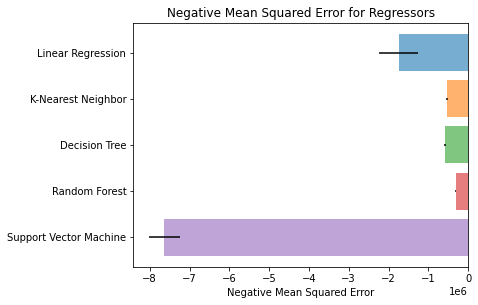

In [226]:
# Plot bar graphs that show mean and standard deviation of cross-validation accuracy of regressors
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for Regressors'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

When all features were used. Random Forest algorithm provided the highest accuracy (lowest mean squared error), followed by K-Nearest Neighbour and Decision Tree.

## Experiment 2: Drop columns 'x', 'y' and 'z' and compare regression models

The columns 'x', 'y' and 'z', which represented the length, width and depth of diamonds, showed very strong correlation with each other and with 'carat' (multicollinearity). In this experiment, we will investigate the effects of removing columns 'x', 'y' and 'z'.

In [227]:
# Remove columns 'x', 'y' and 'z' from training and test data
X_train = X_train.drop(['x', 'y', 'z'], axis=1)
X_test = X_test.drop(['x', 'y', 'z'], axis=1)

In [228]:
# Instantiate regression models
linear = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR(kernel='rbf')

In [229]:
# Evaluate the regressors
mean_scores_table, std_scores_table = models_evaluation(X_train, y_train)

# Display the average accuracy
print(mean_scores_table)

# Display the standard deviations of cross-validation accuracy
print(std_scores_table)

                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error      -1.539809e+06      -790485.341898   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error -554592.205059 -317173.748197   

                             Support Vector Machine     Best Score  
Negative Mean Squared Error           -1.174635e+07  Random Forest  
                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error       49132.867504        40542.218139   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error   28668.714117   17706.971762   

                             Support Vector Machine Minimum standard deviation  
Negative Mean Squared Error            529064.22132              Random Forest  


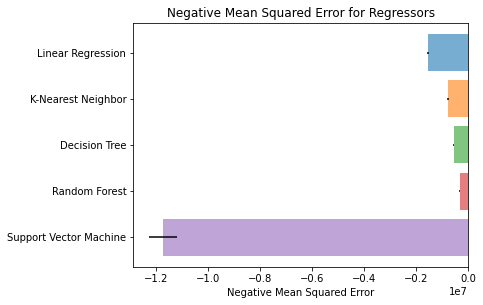

In [230]:
# Plot bar graphs that show mean and standard deviation of cross-validation accuracy of regressors
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for Regressors'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

After removing columns 'x', 'y' and 'z', the negative mean squared error of Linear Regression and Decision Tree decreased, whereas the negative mean squared error of K-Nearest Neighbour, Random Forest and Support Vector Machine increased. It is also noted the standard deviation of the negative mean squared error of the Linear Regression model decreased significantly. When building our final model, we will exclude columns 'x', 'y' and 'z', so as to eliminate multicollinearity.

Similar to the previous experiment, Random Forest yielded the highest accuracy (smallest mean squared error). Decision Tree became the second best algorithm, followed by K-Nearest Neighbour.



## Experiment 3: Hyperparameter optimization

In this experiment, we will look into optimizing the hyperparameters of the two best algorithms - Random Forest and K-Nearest Neighbour.

###  Optimizing Random Forest model

In [231]:
rf_params = {'n_estimators':[50,100],'max_depth':[3,5,7,9],'min_samples_leaf':[3,5,7,9]}
randomizedsearch_rf = RandomizedSearchCV(estimator = rf, param_distributions=rf_params, n_iter=25, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state =1)

In [232]:
randomizedsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'n_estimators': [50, 100]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=1)

In [233]:
print("Best parameters: " , randomizedsearch_rf.best_params_)
print("Smallest Magnitude of Mean-Squared Error: ", randomizedsearch_rf.best_score_)

Best parameters:  {'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 9}
Smallest Magnitude of Mean-Squared Error:  -351544.4063130034


In [234]:
# Fit optimized Random Forest model to all training data
best_rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_depth=9, random_state=1)
best_rf.fit(X_train, y_train)
y_pred_train = best_rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test = best_rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Train Mean-Squared Error: %.2f' % mse_train)
print('Test Mean-Squared Error: %.2f' % mse_test)

Train Mean-Squared Error: 300843.67
Test Mean-Squared Error: 308304.13


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

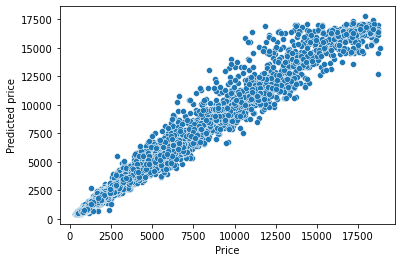

In [235]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [236]:
r2_score(y_test,y_pred_test)

0.9794726060487964

In [237]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 303.45


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

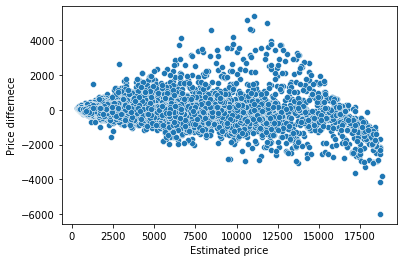

In [238]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

In [239]:
# Create a DataFrame with the feature importances
feature_importances = pd.DataFrame({"feature": list(X_train.columns), "importance": best_rf.feature_importances_}).sort_values("importance", ascending=False)

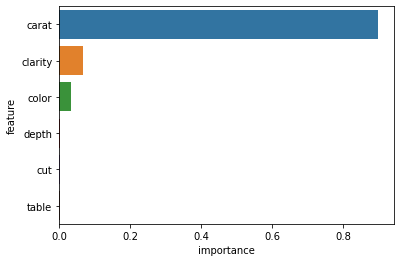

In [240]:
# Draw a horizontal barplot of importances_sorted
sns.barplot(data=feature_importances, x="importance", y="feature")
plt.show()

Feature importance analysis revealed 'carat' was by far the most importance feature for diamond price prediction. 'Clarity' and 'color' were the next two most important features. 'Depth', 'cut' and 'table' were of negligible importance.

### Optimizing Decision Tree model

In [249]:
dt_params = {'max_depth':[3,5,7,9],'min_samples_leaf':[3,5,7,9]}
randomizedsearch_dt = RandomizedSearchCV(estimator = dt, param_distributions=dt_params, n_iter=25, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state =1)

In [250]:
randomizedsearch_dt.fit(X_train, y_train)

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 16 is smaller than n_iter=25. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
                   n_iter=25,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [3, 5, 7, 9]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=1)

In [251]:
print("Best parameters: " , randomizedsearch_dt.best_params_)
print("Smallest Magnitude of Mean-Squared Error: ", randomizedsearch_dt.best_score_)

Best parameters:  {'min_samples_leaf': 9, 'max_depth': 9}
Smallest Magnitude of Mean-Squared Error:  -420714.8312091986


In [252]:
# Fit optimized Decision Tree model to all training data
best_dt = DecisionTreeRegressor(min_samples_leaf=9, max_depth=9, random_state=1)
best_dt.fit(X_train, y_train)
y_pred_train = best_dt.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test = best_dt.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Train Mean-Squared Error: %.2f' % mse_train)
print('Test Mean-Squared Error: %.2f' % mse_test)

Train Mean-Squared Error: 354267.98
Test Mean-Squared Error: 367470.99


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

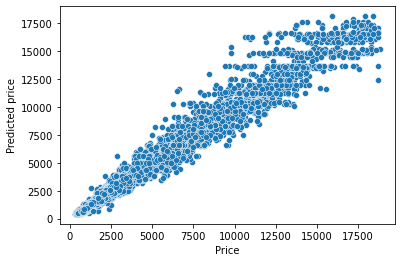

In [253]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [254]:
r2_score(y_test,y_pred_test)

0.9755331803183086

In [255]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 335.97


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

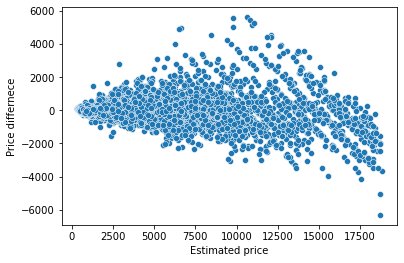

In [256]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

### Optimizing K-Nearest Neighbour model

In [241]:
knn_params =  {'n_neighbors':[3,5,7,9]}
randomizedsearch_knn = RandomizedSearchCV(estimator = knn, param_distributions=knn_params, n_iter=25, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state =1)

In [242]:
randomizedsearch_knn.fit(X_train, y_train)

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=25. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=25,
                   param_distributions={'n_neighbors': [3, 5, 7, 9]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=1)

In [243]:
print("Best parameters: " , randomizedsearch_knn.best_params_)
print("Smallest Magnitude of Mean-Squared Error: ", randomizedsearch_knn.best_score_)

Best parameters:  {'n_neighbors': 7}
Smallest Magnitude of Mean-Squared Error:  -790418.0570383116


In [244]:
# Fit optimized K-Nearest Neighbor model to all training data
best_knn = KNeighborsRegressor(n_neighbors= 9)
best_knn.fit(X_train, y_train)
y_pred_train = best_knn.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test = best_knn.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Train Mean-Squared Error: %.2f' % mse_train)
print('Test Mean-Squared Error: %.2f' % mse_test)

Train Mean-Squared Error: 593684.30
Test Mean-Squared Error: 690512.03


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

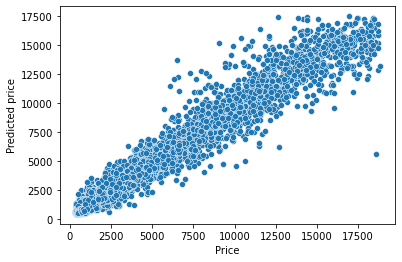

In [245]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [246]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 482.35


In [247]:
r2_score(y_test,y_pred_test)

0.9540245790442724

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

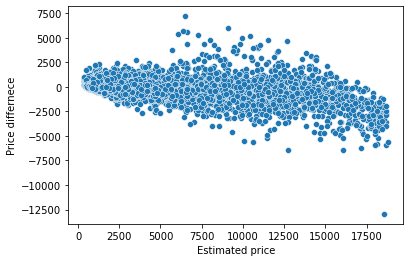

In [248]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

## Conclusion

The highest accuracy was attained by the optimized Random Forest algorithm, which provided a test mean squared error of 308304.13 and R^2 of 0.98. On average, the diamond price predicted by the model deviated from the actual price by only 303.45 dollars. Feature importance analysis revealed 'carat' was by far the most importance feature for diamond price prediction. 'Clarity' and 'color' were the second and third most important features respectively.